# Pandas

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from IPython.display import Image, IFrame

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:  
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [3]:
IFrame(src='http://pandas.pydata.org/index.html', width=1000, height=350)

### The conventional way to import pandas is: 

```python
import pandas as pd
```

In [4]:
import pandas as pd

In [5]:
print(pd.__version__)

0.24.2


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

some options setting 

In [10]:
pd.set_option("display.width", 80)
# toggle the line below that if one doesnt want DataFrames displayed as HTML tables
#pd.set_option("notebook_repr_html", False) 
pd.set_option("notebook_repr_html", True) 

### Pandas's data structures and functionalities will be familiar to R users, there's a section on Pandas's website where Wes McKinney gives some translation of common idioms / operations between R and Pandas 

In [166]:
IFrame('http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html#compare-with-r', width=1000, height=350)

## Pandas data structures

### Series


A **Series** is a single vector of data values (think a NumPy array with shape N or (N,1)) with an **index** that labels each element in the vector.

#### Series constructions

In [13]:
np.random.seed(42)

In [14]:
x = np.random.normal(0,1,(10,))

In [16]:
x.shape

(10,)

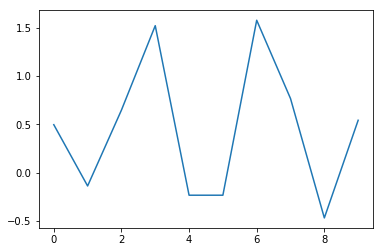

In [17]:
plt.plot(x)

In [18]:
a = pd.Series(x)

In [19]:
a

0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
5   -0.234137
6    1.579213
7    0.767435
8   -0.469474
9    0.542560
dtype: float64

In [20]:
a.index

RangeIndex(start=0, stop=10, step=1)

In [21]:
a.values

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

#### You can define your own **index**

In [22]:
a = pd.Series(x, index=np.arange(1,11))

In [23]:
a

1     0.496714
2    -0.138264
3     0.647689
4     1.523030
5    -0.234153
6    -0.234137
7     1.579213
8     0.767435
9    -0.469474
10    0.542560
dtype: float64

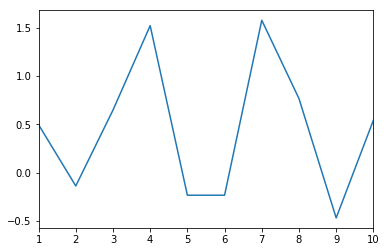

In [24]:
a.plot()

In [25]:
a = pd.Series(np.random.normal(0,1,(5,)), index=['a','b','c','d','e'], name='my series')

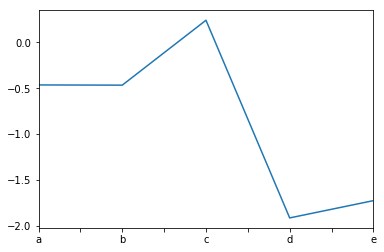

In [26]:
a.plot()

Pandas objects expose some powerful, **high level plotting functions** (built on top of Matplotlib)

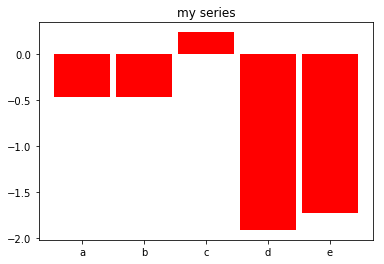

In [27]:
a.plot(kind='bar', rot=0, color='r', title=a.name, width=0.9)

same plot in matplotlib

Text(0.5, 1.0, 'my series')

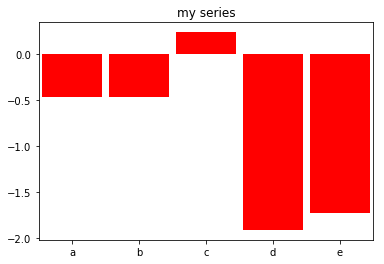

In [28]:
f, ax = plt.subplots()
bars = ax.bar(np.arange(len(a)), a.values, color='r', align='center', width=0.9)
ax.set_xticks(np.arange(len(a)))
ax.set_xlim(-0.5, len(a)-0.5)
ax.set_xticklabels(a.index)
ax.set_title(a.name)

#### Series indexing

Selecting from a Series is easy, using the corresponding index key (like a dict)

In [29]:
a

a   -0.463418
b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

In [30]:
a['c']

0.24196227156603412

slices are permitted 

In [31]:
a['a':'c'] ### Note the difference with standard Python / Numpy positional, integer indexing

a   -0.463418
b   -0.465730
c    0.241962
Name: my series, dtype: float64

In [32]:
a['c':]

c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

deleting an element 

In [33]:
a

a   -0.463418
b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

In [34]:
a.drop('d')

a   -0.463418
b   -0.465730
c    0.241962
e   -1.724918
Name: my series, dtype: float64

In [35]:
a.drop('a', inplace=True)

In [36]:
a

b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

Adding an element is (to my knowledge) not straightforward

In [38]:
a.append(pd.Series({'a':5}))

b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
a    5.000000
dtype: float64

In [40]:
a

b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

In [41]:
a = a.append(pd.Series({'a':5}))

In [42]:
a

b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
a    5.000000
dtype: float64

In [45]:
a = a.sort_index()

Mathematical operations involving two series will perform operations by *aligning indices*.

1. The union of all indices is created
2. The mathematical operation is performed on matching indices. 

Indices that do not match are given the value NaN (not a number), and values are computed for all unique pairs of repeated indices.

In [46]:
s1 = pd.Series(np.arange(1.0,4.0),index=['a','b','c'])
s2 = pd.Series(np.arange(1.0,4.0),index=['b','c','d'])

In [49]:
s1

a    1.0
b    2.0
c    3.0
dtype: float64

In [50]:
s2

b    1.0
c    2.0
d    3.0
dtype: float64

In [51]:
s1df = s1.to_frame()

In [52]:
s2df = s2.to_frame()

In [55]:
s1df.merge(s2df, left_index=True, right_index=True, how='outer')

,0_x,0_y
a,1.0,NaN
b,2.0,1.0
c,3.0,2.0
d,NaN,3.0


In [53]:
pd.concat([s1, s2], axis=1)

,0,1
a,1.0,NaN
b,2.0,1.0
c,3.0,2.0
d,NaN,3.0


In [47]:
s3 = s1 + s2

In [48]:
s3

a    NaN
b    3.0
c    5.0
d    NaN
dtype: float64

NaNs are ignored in all operations 

In [162]:
s3.mean()

4.0

You can drop them from the Series

In [163]:
s4 = s3.dropna()

In [164]:
s4

b    3.0
c    5.0
dtype: float64

Or use the `fillna` method to replace them by a value

In [165]:
s3.fillna(-999)

a   -999.0
b      3.0
c      5.0
d   -999.0
dtype: float64

In [166]:
s3.fillna(s3.mean())

a    4.0
b    3.0
c    5.0
d    4.0
dtype: float64

### DataFrames

**DataFrames** are IMHO one of the most powerful data structures in the Python / data analysis world. 

They can be viewed as a *collection* of named Series. They feature two **indexes**, respectively for the rows and the columns, and can contain heteregoneous data types (although it must be consistent *within* each column). 
Note that a DataFrame index, either along the rows or the columns (or both !) can contain more than one level, they are called **hierarchical indexes** and allows the representation of complex data organisation. 

If the index along the rows of a DataFrame is of **datetime** type, all the methods exposed for the Series (re-sampling, shifting, truncating, etc) are available for the DataFrame.

#### DataFrame constructions

In [56]:
import string # part of the standard library
idx = list(string.ascii_lowercase[0:10])
print(idx)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [57]:
df = pd.DataFrame(np.arange(100).reshape(10,10),\
                  columns=idx,index=np.arange(1,11))

In [58]:
df

,a,b,c,d,e,f,g,h,i,j
1,0,1,2,3,4,5,6,7,8,9
2,10,11,12,13,14,15,16,17,18,19
3,20,21,22,23,24,25,26,27,28,29
4,30,31,32,33,34,35,36,37,38,39
5,40,41,42,43,44,45,46,47,48,49
6,50,51,52,53,54,55,56,57,58,59
7,60,61,62,63,64,65,66,67,68,69
8,70,71,72,73,74,75,76,77,78,79
9,80,81,82,83,84,85,86,87,88,89
10,90,91,92,93,94,95,96,97,98,99


In [59]:
### here I am creating a DataFrame from a dictionnary

df = pd.DataFrame({'a' : np.random.random(5),\
                   'b' : np.random.random(5),\
                   'c': np.random.random(5)}, index=np.arange(1,6))

In [60]:
df

,a,b,c
1,0.611853,0.785176,0.607545
2,0.139494,0.199674,0.170524
3,0.292145,0.514234,0.065052
4,0.366362,0.592415,0.948886
5,0.456070,0.046450,0.965632


#### Indexing a DataFrame

different ways, return either a Series or a DataFrame

In [61]:
df[['a']]

,a
1,0.611853
2,0.139494
3,0.292145
4,0.366362
5,0.456070


In [62]:
type(df['a']) 

pandas.core.series.Series

In [63]:
df[['a']]

,a
1,0.611853
2,0.139494
3,0.292145
4,0.366362
5,0.456070


In [64]:
type(df['a'])

pandas.core.series.Series

To access a particular *row* instead of a column, you use the *loc* method

In [65]:
df

,a,b,c
1,0.611853,0.785176,0.607545
2,0.139494,0.199674,0.170524
3,0.292145,0.514234,0.065052
4,0.366362,0.592415,0.948886
5,0.456070,0.046450,0.965632


In [69]:
df.loc[3,:]

a    0.292145
b    0.514234
c    0.065052
Name: 3, dtype: float64

In [70]:
df

,a,b,c
1,0.611853,0.785176,0.607545
2,0.139494,0.199674,0.170524
3,0.292145,0.514234,0.065052
4,0.366362,0.592415,0.948886
5,0.456070,0.046450,0.965632


access values per **positional indices** only

In [71]:
df.iloc[2,0:2]

a    0.292145
b    0.514234
Name: 3, dtype: float64

In [72]:
type(_)

pandas.core.series.Series

And you can combine of course row (with ix) and column indexing, using the same convention for slices as we saw for the Series 

In [74]:
df.loc[3,:]['a':'b']

a    0.292145
b    0.514234
Name: 3, dtype: float64

In [75]:
df.loc[3:5,:][['a','c']]

,a,c
3,0.292145,0.065052
4,0.366362,0.948886
5,0.456070,0.965632


you can also use the `loc` method, giving it both row **AND** columns indexes 
(the indexing is based on the *label*, **NOT** on the *position*)

In [73]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


In [75]:
df.loc[[3,5],:]

,a,b,c
3,0.329030,0.642635,0.848144
5,0.204741,0.535436,0.559616


conditional indexing or subsetting of a DataFrame 

In [76]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


In [77]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


In [76]:
subset = df[df['a'] <= 0.4]

In [77]:
subset

,a,b,c
2,0.139494,0.199674,0.170524
3,0.292145,0.514234,0.065052
4,0.366362,0.592415,0.948886


#### queries

as from Pandas version 0.14, you can build complex *database-like* queries on DataFrames

In [78]:
df

,a,b,c
1,0.611853,0.785176,0.607545
2,0.139494,0.199674,0.170524
3,0.292145,0.514234,0.065052
4,0.366362,0.592415,0.948886
5,0.456070,0.046450,0.965632


In [79]:
df.query('a > b')

,a,b,c
5,0.45607,0.04645,0.965632


In [80]:
df.query('(a > b) & (b > c)')

,a,b,c


#### Extending a DataFrame

Adding a column is easy 

In [81]:
df

,a,b,c
1,0.611853,0.785176,0.607545
2,0.139494,0.199674,0.170524
3,0.292145,0.514234,0.065052
4,0.366362,0.592415,0.948886
5,0.456070,0.046450,0.965632


In [82]:
df['d'] = np.random.random(5)

In [83]:
df

,a,b,c,d
1,0.611853,0.785176,0.607545,0.808397
2,0.139494,0.199674,0.170524,0.304614
3,0.292145,0.514234,0.065052,0.097672
4,0.366362,0.592415,0.948886,0.684233
5,0.456070,0.046450,0.965632,0.440152


### or 

In [84]:
df.loc[:,'d'] = np.random.random(5)

In [85]:
df

,a,b,c,d
1,0.611853,0.785176,0.607545,0.122038
2,0.139494,0.199674,0.170524,0.495177
3,0.292145,0.514234,0.065052,0.034389
4,0.366362,0.592415,0.948886,0.909320
5,0.456070,0.046450,0.965632,0.258780


The following works because Pandas understands that a single value must be repeated over the row length

In [86]:
df.loc[:,'e'] = 5

In [87]:
df

,a,b,c,d,e
1,0.611853,0.785176,0.607545,0.122038,5
2,0.139494,0.199674,0.170524,0.495177,5
3,0.292145,0.514234,0.065052,0.034389,5
4,0.366362,0.592415,0.948886,0.909320,5
5,0.456070,0.046450,0.965632,0.258780,5


The following doesn't work because there's no way to tell **where** to insert the missing value (align to 1st or last index ?)

In [88]:
df.loc[:,'f'] = np.random.random(4)

ValueError: Must have equal len keys and value when setting with an iterable

Unless we make a series out of it, with a index matching at least partly the DataFrame (row) index

In [89]:
df.loc[:,'f'] = pd.Series(np.random.random(4), index=np.arange(1,5)) #

In [90]:
df

,a,b,c,d,e,f
1,0.611853,0.785176,0.607545,0.122038,5,0.184854
2,0.139494,0.199674,0.170524,0.495177,5,0.969585
3,0.292145,0.514234,0.065052,0.034389,5,0.775133
4,0.366362,0.592415,0.948886,0.909320,5,0.939499
5,0.456070,0.046450,0.965632,0.258780,5,NaN


#### Useful DataFrames methods

##### applying a numpy function

In [91]:
df.apply(np.sqrt) # or np.sqrt(df)

,a,b,c,d,e,f
1,0.782210,0.886102,0.779452,0.349340,2.236068,0.429947
2,0.373489,0.446849,0.412946,0.703688,2.236068,0.984675
3,0.540504,0.717101,0.255052,0.185441,2.236068,0.880416
4,0.605278,0.769685,0.974108,0.953583,2.236068,0.969278
5,0.675330,0.215524,0.982666,0.508704,2.236068,NaN


##### summarizing data

In [92]:
df.describe()

,a,b,c,d,e,f
count,5.000000,5.000000,5.000000,5.000000,5.0,4.000000
mean,0.373185,0.427590,0.551528,0.363941,5.0,0.717268
std,0.176818,0.299898,0.422592,0.351014,0.0,0.365086
min,0.139494,0.046450,0.065052,0.034389,5.0,0.184854
25%,0.292145,0.199674,0.170524,0.122038,5.0,0.627563
50%,0.366362,0.514234,0.607545,0.258780,5.0,0.857316
75%,0.456070,0.592415,0.948886,0.495177,5.0,0.947020
max,0.611853,0.785176,0.965632,0.909320,5.0,0.969585


##### replacing values

In [93]:
df.head()

,a,b,c,d,e,f
1,0.611853,0.785176,0.607545,0.122038,5,0.184854
2,0.139494,0.199674,0.170524,0.495177,5,0.969585
3,0.292145,0.514234,0.065052,0.034389,5,0.775133
4,0.366362,0.592415,0.948886,0.909320,5,0.939499
5,0.456070,0.046450,0.965632,0.258780,5,NaN


In [94]:
df['e'].replace(5, 0.0, inplace=True) 
# you can use dictionnary to multiple replacements

##### assign 

In [95]:
df.assign(f = df['a'] + df['e'])

,a,b,c,d,e,f
1,0.611853,0.785176,0.607545,0.122038,0,0.611853
2,0.139494,0.199674,0.170524,0.495177,0,0.139494
3,0.292145,0.514234,0.065052,0.034389,0,0.292145
4,0.366362,0.592415,0.948886,0.909320,0,0.366362
5,0.456070,0.046450,0.965632,0.258780,0,0.456070


that allows you to write very succint code

In [97]:
df.query('a > 0.4').assign(f = df['a'] + df['e'])

,a,b,c,d,e,f
1,0.611853,0.785176,0.607545,0.122038,0,0.611853
5,0.456070,0.046450,0.965632,0.258780,0,0.456070


#### DataFrame high-level plotting functions

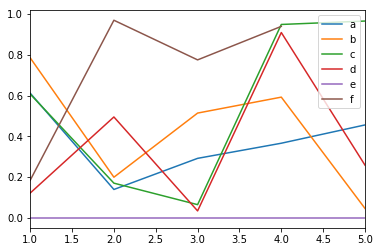

In [98]:
df.plot()

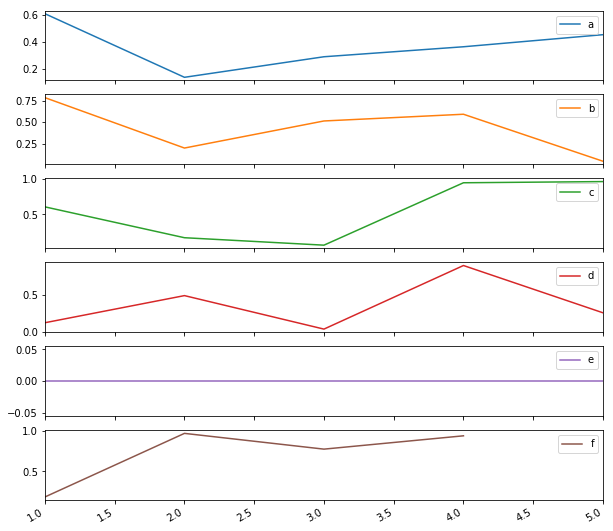

In [99]:
df.plot(subplots=True, figsize=(10,10));

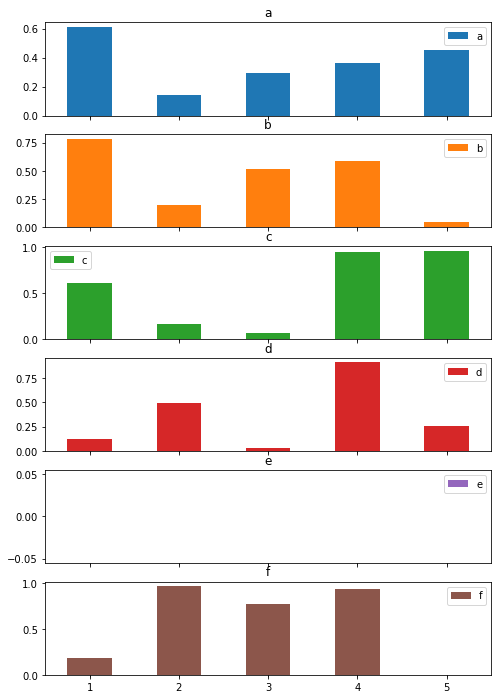

In [100]:
df.plot(figsize=(8,12), \
                          subplots=True, \
                          sharex=True, \
                          kind='bar', rot=0); 

In [102]:
import pandas as pd
from sklearn.datasets import load_iris
 
    
iris = load_iris()
 
iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [103]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


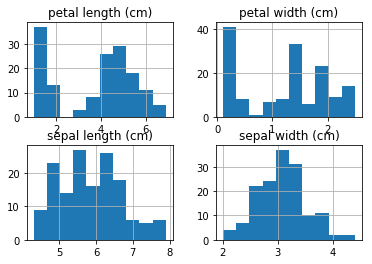

In [104]:
iris.hist(); 

In [107]:
from pandas.plotting import scatter_matrix

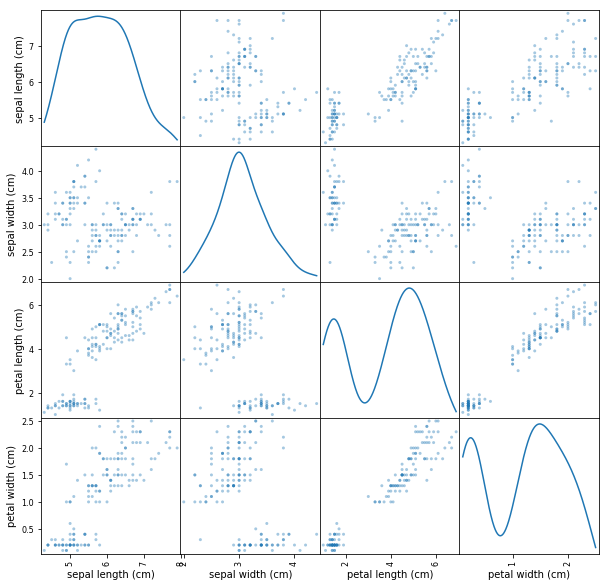

In [108]:
scatter_matrix(iris, alpha=0.4, figsize=(10, 10), diagonal='kde'); 

In [110]:
IFrame('http://pandas.pydata.org/pandas-docs/version/0.24.2/user_guide/visualization.html', width=1000, height=350)

### Input and Output in pandas

Pandas has **very powerful IO methods**, allowing to load csv, excel, tab-delimited files very easily. Pandas DataFrames can also be 
saved also in csv, excel files. 

Other supported file types are: 

* JSON (JavaScript Object Notation)
* HDF5 
* HTML (to e.g. read tables contained in HTML documents)
* SQL (Pandas can **query directly from SQL databases** thanks to [SQLAlchemy](http://www.sqlalchemy.org/))
* ...

#### reading from CSV or Excel files

In [112]:
SOI = pd.read_csv('../data/NIWA_SOI_1941_2010.csv') 

In [113]:
SOI.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1876,1.139736,0.963261,0.072242,0.957619,0.793056,1.830828,-0.526367,1.264818,0.985830,-0.776112,-0.341365,-0.382784
1,1877,-0.926413,-0.595044,-0.401848,-0.732915,0.480302,-1.601975,-0.990252,-0.779333,-1.753059,-1.548826,-1.307492,-1.356213
2,1878,-0.832497,-1.900650,-1.455382,-0.659413,0.323924,-0.212507,1.660518,1.328698,1.700323,1.066516,1.397664,1.717772
3,1879,1.280610,1.258075,1.336483,1.251625,0.323924,1.749095,2.256941,2.286894,1.819405,1.482594,0.882396,-0.638950
4,1880,1.092778,0.668446,1.441837,0.590112,1.340376,1.013494,0.202595,1.456458,0.747666,0.472120,0.624762,-0.280318


In [114]:
SOI.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
139,2015,-0.738581,0.036701,-1.033968,-0.218404,-1.239848,-1.111574,-1.454136,-1.929168,-1.812600,-1.964904,-0.598999,-0.997581
140,2016,-1.912530,-1.774301,-0.401848,-1.835437,0.402113,0.686561,0.467671,0.562142,1.283535,-0.419474,-0.148140,0.180780
141,2017,0.153620,-0.215997,0.546333,-0.438909,0.167547,-0.948108,0.865287,0.370502,0.628584,0.888198,1.075622,-0.229085
142,2018,0.904946,-0.552927,1.073100,0.516610,0.323924,-0.457707,0.202595,-0.651573,-1.038566,0.293802,-0.083731,0.846809
143,2019,-0.034212,-1.226789,-0.612555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
SOI = pd.read_csv('../data/NIWA_SOI_1941_2010.csv', index_col=0) 

In [116]:
SOI.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1876,1.139736,0.963261,0.072242,0.957619,0.793056,1.830828,-0.526367,1.264818,0.985830,-0.776112,-0.341365,-0.382784
1877,-0.926413,-0.595044,-0.401848,-0.732915,0.480302,-1.601975,-0.990252,-0.779333,-1.753059,-1.548826,-1.307492,-1.356213
1878,-0.832497,-1.900650,-1.455382,-0.659413,0.323924,-0.212507,1.660518,1.328698,1.700323,1.066516,1.397664,1.717772
1879,1.280610,1.258075,1.336483,1.251625,0.323924,1.749095,2.256941,2.286894,1.819405,1.482594,0.882396,-0.638950
1880,1.092778,0.668446,1.441837,0.590112,1.340376,1.013494,0.202595,1.456458,0.747666,0.472120,0.624762,-0.280318


#### Saving in csv, excel etc

In [117]:
recent_SOI = SOI.loc[2013:,:]

In [118]:
recent_SOI.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2013,-0.081170,-0.342346,1.073100,0.149103,0.949433,1.503895,0.865287,-0.012776,0.330878,-0.181715,0.817988,-0.024153
2014,1.233652,-0.131764,-1.244675,0.884118,0.558490,-0.049040,-0.261290,-1.098731,-0.800402,-0.776112,-1.049859,-0.638950
2015,-0.738581,0.036701,-1.033968,-0.218404,-1.239848,-1.111574,-1.454136,-1.929168,-1.812600,-1.964904,-0.598999,-0.997581
2016,-1.912530,-1.774301,-0.401848,-1.835437,0.402113,0.686561,0.467671,0.562142,1.283535,-0.419474,-0.148140,0.180780
2017,0.153620,-0.215997,0.546333,-0.438909,0.167547,-0.948108,0.865287,0.370502,0.628584,0.888198,1.075622,-0.229085


##### saving to a csv file

In [120]:
recent_SOI.to_csv('../data/recent_SOI.csv')

##### saving to an Excel file

In [122]:
recent_SOI.to_excel('../data/recent_SOI.xlsx', header=False, sheet_name='SOI')

##### if you want to save each year in a different sheet in an excel spreadsheet 

In [127]:
writer = pd.ExcelWriter('../data/recent_SOI_sheets.xlsx', engine='xlsxwriter')

In [128]:
for year in range(2013, 2017+1): 
    year_soi = SOI.loc[year,:]
    year_soi.to_excel(writer, sheet_name=str(year))

In [129]:
writer.save()

#### dealing with separators in text files

In [153]:
url = 'http://www.jamstec.go.jp/frsgc/research/d1/iod/DATA/emi.weekly.txt'

In [155]:
IFrame(url, width=900, height=300)

In [157]:
EMI_weekly = pd.read_table('http://www.jamstec.go.jp/frsgc/research/d1/iod/DATA/emi.weekly.txt')

In [158]:
EMI_weekly.head()

,1981:11:8:0 -0.0675758
0,1981:11:15:0 0.16092
1,1981:11:22:0 -0.01371
2,1981:11:29:0 0.47835
3,1981:12:6:0 0.0942509
4,1981:12:13:0 0.0161971


In [160]:
EMI_weekly = pd.read_table('http://www.jamstec.go.jp/frsgc/research/d1/iod/DATA/emi.weekly.txt', header=None)

#### You can use [regular expressions](http://en.wikipedia.org/wiki/Regular_expression) to specify what delimiters to use. 

To know more about regular expressions and their use from Python via the [re](https://docs.python.org/2/library/re.html) package, read: [http://www.ucs.cam.ac.uk/docs/course-notes/unix-courses/PythonRE/files/PythonRE.pdf](http://www.ucs.cam.ac.uk/docs/course-notes/unix-courses/PythonRE/files/PythonRE.pdf)

In [164]:
EMI_weekly = pd.read_table('http://www.jamstec.go.jp/frsgc/research/d1/iod/DATA/emi.weekly.txt', \
                            header=None, sep=r'[:, \s*]', parse_dates={'date':[0,1,2]}, engine='python',\
                            index_col='date', usecols=[0,1,2,4])

In [165]:
EMI_weekly.head()

,4
date,
1981-11-08,-0.067576
1981-11-15,0.160920
1981-11-22,-0.013710
1981-11-29,0.478350
1981-12-06,0.094251


### or you can parse the dates after loading the spaces separated columns, then set them as the index

In [169]:
EMI_weekly = pd.read_table('http://www.jamstec.go.jp/frsgc/research/d1/iod/DATA/emi.weekly.txt', sep=r'\s*', engine='python', header=None)

In [170]:
EMI_weekly.head()

,0,1
0,1981:11:8:0,-0.067576
1,1981:11:15:0,0.160920
2,1981:11:22:0,-0.013710
3,1981:11:29:0,0.478350
4,1981:12:6:0,0.094251


In [174]:
EMI_weekly.index = pd.to_datetime(EMI_weekly.loc[:,0], format="%Y:%m:%d:0")

In [175]:
EMI_weekly.head()

,0,1
0,,
1981-11-08,1981:11:8:0,-0.067576
1981-11-15,1981:11:15:0,0.160920
1981-11-22,1981:11:22:0,-0.013710
1981-11-29,1981:11:29:0,0.478350
1981-12-06,1981:12:6:0,0.094251


In [177]:
EMI_weekly = EMI_weekly.drop(0, axis=1)

In [178]:
EMI_weekly.columns = ['EMI']

In [181]:
EMI_weekly.index.name = 'date'

In [182]:
EMI_weekly.head()

,EMI
date,
1981-11-08,-0.067576
1981-11-15,0.160920
1981-11-22,-0.013710
1981-11-29,0.478350
1981-12-06,0.094251


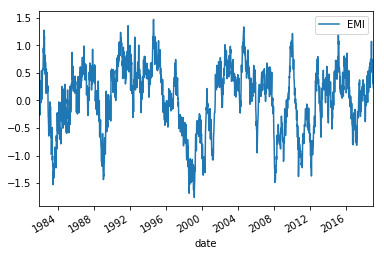

In [183]:
EMI_weekly.plot();

### groupby operations in Pandas 

The **groupby** method is a very powerful method of pandas DataFrames, in a nutschell it allows you to

1. **split** your data according to unique values of a variable (or unique *combinations* of *N* variables)

2. **apply** some operation to the groups thus defined, either an *aggregation* or *transformation* method 

3. **combine** the results into a DataFrame

This process is illustrated below, where the operation is here calculating the mean of the groups's values

A very nice explanation of the **groupby** method, with examples, is available from Pandas's documentation at:  

[http://pandas.pydata.org/pandas-docs/stable/groupby.html](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

and a short tutorial on Wes McKinney's blog [here](http://wesmckinney.com/blog/?p=125)

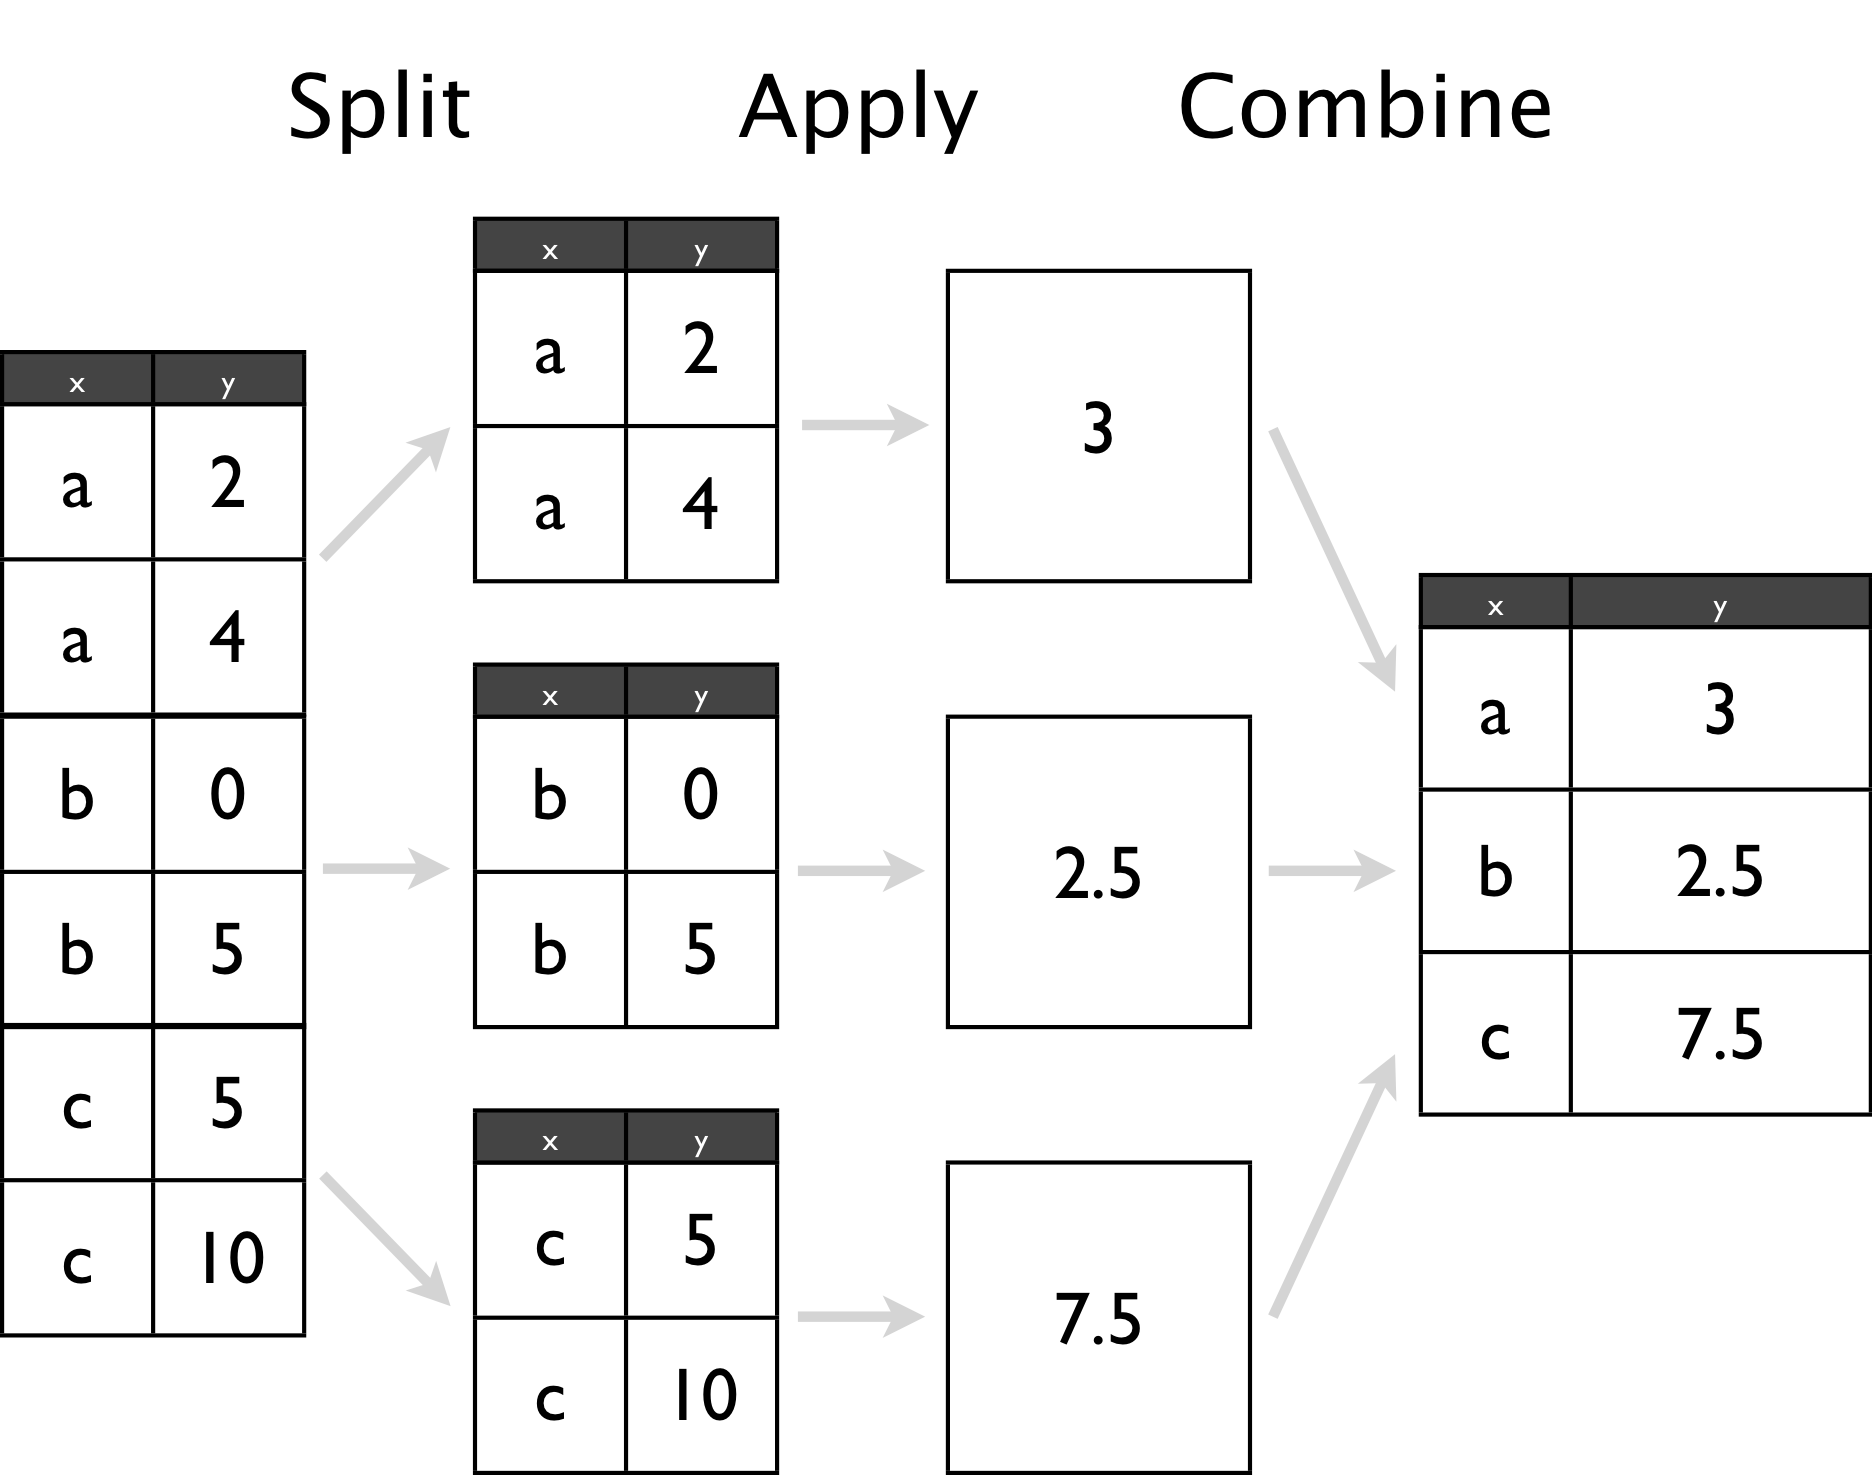

In [184]:
Image(filename='images/split-apply-combine.png', width=800)

In [188]:
url = "https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.81-10.ascii"

In [225]:
# !wget -P ../data https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.81-10.ascii

In [190]:
# if the network confirguration allows it, you can read directly off the URL (ftp):

data = pd.read_table(url, sep='\s+')

In [191]:
data.tail()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
826,2018,11,22.46,0.77,26.00,0.96,29.61,1.06,27.61,0.98
827,2018,12,23.86,0.98,26.14,0.94,29.45,1.01,27.49,0.93
828,2019,1,25.40,0.85,26.25,0.59,29.08,0.84,27.20,0.65
829,2019,2,26.63,0.61,26.99,0.58,28.91,0.81,27.48,0.74
830,2019,3,26.56,0.14,27.85,0.69,29.00,0.79,28.13,0.89


I only keep the raw - monthly - values of NINO 3.4 

In [192]:
nino = data.loc[:,['YR','MON','NINO3.4']]

In [193]:
nino.head()

,YR,MON,NINO3.4
0,1950,1,24.55
1,1950,2,25.06
2,1950,3,25.87
3,1950,4,26.28
4,1950,5,26.18


Now I want to calculate a climatology (over the whole period available)

I first group by UNIQUE values of the variable `MON` (the month), I should get 12 groups

In [194]:
groups = nino.groupby('MON')

In [195]:
for month, group in groups:
    print(month)
    print(group.head())

1
      YR  MON  NINO3.4
0   1950    1    24.55
12  1951    1    25.24
24  1952    1    26.67
36  1953    1    26.74
48  1954    1    26.98
2
      YR  MON  NINO3.4
1   1950    2    25.06
13  1951    2    25.71
25  1952    2    26.74
37  1953    2    27.00
49  1954    2    27.03
3
      YR  MON  NINO3.4
2   1950    3    25.87
14  1951    3    26.90
26  1952    3    27.17
38  1953    3    27.57
50  1954    3    26.90
4
      YR  MON  NINO3.4
3   1950    4    26.28
15  1951    4    27.58
27  1952    4    27.80
39  1953    4    28.04
51  1954    4    26.64
5
      YR  MON  NINO3.4
4   1950    5    26.18
16  1951    5    27.92
28  1952    5    27.79
40  1953    5    28.28
52  1954    5    27.12
6
      YR  MON  NINO3.4
5   1950    6    26.46
17  1951    6    27.73
29  1952    6    27.18
41  1953    6    28.12
53  1954    6    26.80
7
      YR  MON  NINO3.4
6   1950    7    26.29
18  1951    7    27.60
30  1952    7    26.53
42  1953    7    27.43
54  1954    7    26.11
8
      YR  MON  NIN

In [196]:
climatology = groups.mean()

Same as 

    climatology = groups.aggregate(np.mean)
    
    

In [197]:
climatology

,YR,NINO3.4
MON,,
1,1984.5,26.422286
2,1984.5,26.631000
3,1984.5,27.128857
4,1984.0,27.564348
5,1984.0,27.685942
6,1984.0,27.499420
7,1984.0,27.073043
8,1984.0,26.673478
9,1984.0,26.567391


In [198]:
climatology['NINO3.4']

MON
1     26.422286
2     26.631000
3     27.128857
4     27.564348
5     27.685942
6     27.499420
7     27.073043
8     26.673478
9     26.567391
10    26.536667
11    26.522319
12    26.465362
Name: NINO3.4, dtype: float64

In [199]:
type(climatology)

pandas.core.frame.DataFrame

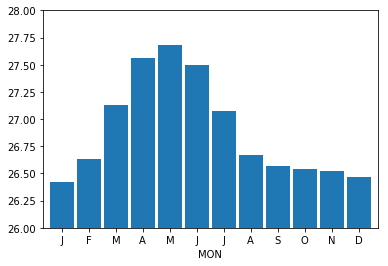

In [200]:
f, ax = plt.subplots()

climatology.loc[:,'NINO3.4'].plot(ax=ax, kind='bar',ylim=[26,28], rot=0, width=0.9)

ax.set_xticklabels(list('JFMAMJJASOND'));

In [201]:
nino.groupby('MON')[['NINO3.4']].mean()

,NINO3.4
MON,
1,26.422286
2,26.631000
3,27.128857
4,27.564348
5,27.685942
6,27.499420
7,27.073043
8,26.673478
9,26.567391


Now suppose we want to apply a function that doesnt **aggregate** the values in the groups (such as *sum*, or *mean*) but rather want to **apply a function** to those values ... 

An example would be calculating the standardized anomalies per month (to each value subtract the mean of the corresponding month, then divide by the standard-deviation)

In [202]:
def zscore(x): 
    z = (x - x.mean()) / x.std()
    return z

In [203]:
nino.head()

,YR,MON,NINO3.4
0,1950,1,24.55
1,1950,2,25.06
2,1950,3,25.87
3,1950,4,26.28
4,1950,5,26.18


In [207]:
transformed = nino.groupby('MON').apply(zscore).loc[:,['NINO3.4']]

In [209]:
transformed.head()

,NINO3.4
0,-1.678858
1,-1.706790
2,-1.779779
3,-2.081607
4,-2.416616


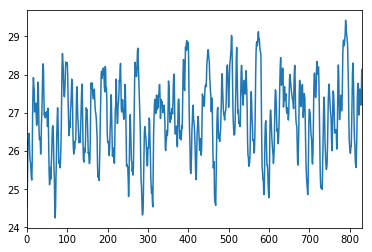

In [210]:
nino.loc[:,'NINO3.4'].plot()

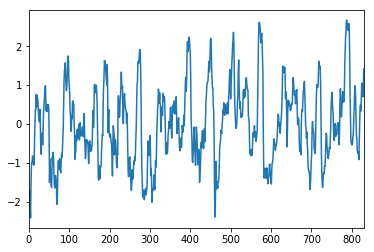

In [211]:
transformed.loc[:,'NINO3.4'].plot()

Now we want calculate (just) the anomalies WRT to the climatology, but with a **normal established over 1981 - 2010**

In [212]:
nino.head()

,YR,MON,NINO3.4
0,1950,1,24.55
1,1950,2,25.06
2,1950,3,25.87
3,1950,4,26.28
4,1950,5,26.18


### remember that we can make use of the *query* method of Pandas DataFrames to select the climatological period

In [213]:
nino.query('YR >= 1981 & YR <= 2010').head()

,YR,MON,NINO3.4
372,1981,1,26.18
373,1981,2,26.11
374,1981,3,26.64
375,1981,4,27.29
376,1981,5,27.36


### now defines the new function 

In [214]:
def demean(x): 
    z = x - x.query('YR >= 1981 & YR <= 2010').mean()
    return z

In [215]:
anoms = nino.groupby('MON').apply(demean)

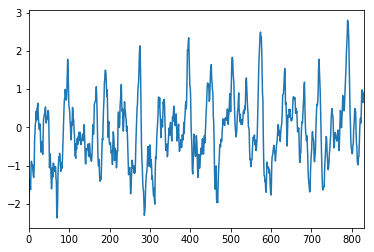

In [216]:
data.loc[:,'ANOM.3'].plot() # Should be the same

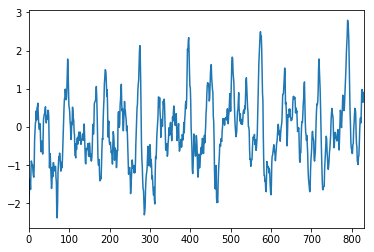

In [217]:
anoms.loc[:,'NINO3.4'].plot()

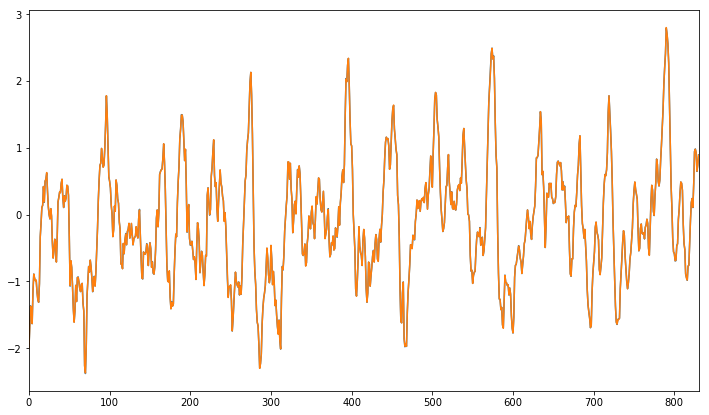

In [223]:
f, ax = plt.subplots(figsize=(12,7))
anoms.loc[:,'NINO3.4'].plot(ax=ax)
data.loc[:,'ANOM.3'].plot(ax=ax)

#### Exercise

The file **Daily_clim_data_Auckland.csv** in the `data` directory (`./data/Daily_clim_data_Auckland.csv`) contains 
daily values for rainfall, minimum and maximum temperatures for Auckland from 1972 to now.  

1. Read the data in a Pandas DataFrame, correctly setting up the index as a datetime index 
2. calculate monthly means for the temperature data, monthly totals for rainfall 
3. calculate and plot a climatology over the period 1981 - 2000 for all parameters 
4. calculate the anomalies WRT this climatology for all parameters 
5. plots the time-series of minimum and maximum temperature 
6. dig into the Scipy documentation to find how to calculate the linear trend over the period for the temperature data 
7. calculate and plot the trend 

### Series with a date / datetime index (timeseries)

Series can have indexes representing dates / times 

In [226]:
a

a    5.000000
b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
dtype: float64

In [227]:
a.index = pd.date_range(start='2014-1-1', periods=len(a)) # default 'period' is daily

Below are the codes for the frequencies that Pandas supports, note that you can specify an integer multiple of a frequency: i.e. `2D` means 2 days 

<div style='float: center'>
  <img style='width: 400px' src="./images/pandas_freqs.png"></img>
</div>

In [228]:
a.head()

2014-01-01    5.000000
2014-01-02   -0.465730
2014-01-03    0.241962
2014-01-04   -1.913280
2014-01-05   -1.724918
Freq: D, dtype: float64

In [229]:
a.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05'],
              dtype='datetime64[ns]', freq='D')

In [230]:
### but you can convert it to an numpy array of python datetime objects if you want
py_datetimes = a.index.to_pydatetime()

In [231]:
py_datetimes

array([datetime.datetime(2014, 1, 1, 0, 0),
       datetime.datetime(2014, 1, 2, 0, 0),
       datetime.datetime(2014, 1, 3, 0, 0),
       datetime.datetime(2014, 1, 4, 0, 0),
       datetime.datetime(2014, 1, 5, 0, 0)], dtype=object)

And a number of useful methods for manipulation of time series is exposed

In [232]:
a

2014-01-01    5.000000
2014-01-02   -0.465730
2014-01-03    0.241962
2014-01-04   -1.913280
2014-01-05   -1.724918
Freq: D, dtype: float64

In [233]:
### the ```shift``` method makes it easy e.g. to compare series with lead / lags 
a.shift(periods=-1)

2014-01-01   -0.465730
2014-01-02    0.241962
2014-01-03   -1.913280
2014-01-04   -1.724918
2014-01-05         NaN
Freq: D, dtype: float64

In [234]:
a

2014-01-01    5.000000
2014-01-02   -0.465730
2014-01-03    0.241962
2014-01-04   -1.913280
2014-01-05   -1.724918
Freq: D, dtype: float64

In [235]:
### and the ```truncate`` method allows easy selection of time-slices
a.truncate(before='2014-1-2', after='2014-1-4')

2014-01-02   -0.465730
2014-01-03    0.241962
2014-01-04   -1.913280
Freq: D, dtype: float64

#### correctly parsing date(times) when date and time information are contained in different columns

In [240]:
data = pd.read_excel('../data/ISO_datetime.xls', sheetname='Sheet1')

In [241]:
data.head()

,date,value
0,2014-01-02,0.786299
1,2014-01-03,0.354398
2,2014-01-04,0.747329
3,2014-01-05,0.461564
4,2014-01-06,0.626105


In [242]:
data['date']

0   2014-01-02
1   2014-01-03
2   2014-01-04
3   2014-01-05
4   2014-01-06
5   2014-01-07
6   2014-01-08
7   2014-01-09
8   2014-01-10
9   2014-01-11
Name: date, dtype: datetime64[ns]

In [244]:
data = pd.read_excel('../data/ISO_datetime.xls', sheetname='Sheet1', index_col=0)

In [245]:
data.head()

,value
date,
2014-01-02,0.786299
2014-01-03,0.354398
2014-01-04,0.747329
2014-01-05,0.461564
2014-01-06,0.626105


In [246]:
data.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11'],
              dtype='datetime64[ns]', name='date', freq=None)

when the year, month and day are contained in different columns

In [247]:
ymd = pd.read_excel('../data/year_month_day.xlsx', sheetname='Sheet1')

In [248]:
ymd.head()

,year,month,day,value
0,2014,1,2,0.786299
1,2014,1,3,0.354398
2,2014,1,4,0.747329
3,2014,1,5,0.461564
4,2014,1,6,0.626105


In [249]:
pd.to_datetime(ymd.loc[:,['year','month','day']])

0   2014-01-02
1   2014-01-03
2   2014-01-04
3   2014-01-05
4   2014-01-06
5   2014-01-07
6   2014-01-08
7   2014-01-09
8   2014-01-10
9   2014-01-11
dtype: datetime64[ns]

In [225]:
ymd.index = pd.to_datetime(ymd.loc[:,['year','month','day']])

In [226]:
ymd

,year,month,day,value
2014-01-02,2014,1,2,0.786299
2014-01-03,2014,1,3,0.354398
2014-01-04,2014,1,4,0.747329
2014-01-05,2014,1,5,0.461564
2014-01-06,2014,1,6,0.626105
2014-01-07,2014,1,7,0.528142
2014-01-08,2014,1,8,0.091771
2014-01-09,2014,1,9,0.807198
2014-01-10,2014,1,10,0.402332
2014-01-11,2014,1,11,0.281455


In [250]:
myd = pd.read_excel('../data/year_month_day.xlsx', sheetname='Sheet2'); myd.head()

,month,year,day,value
0,1,2014,2,0.478467
1,1,2014,3,0.833801
2,1,2014,4,0.837646
3,1,2014,5,0.453646
4,1,2014,6,0.260355


In [251]:
pd.to_datetime(myd.loc[:,['year','month','day']])

0   2014-01-02
1   2014-01-03
2   2014-01-04
3   2014-01-05
4   2014-01-06
5   2014-01-07
6   2014-01-08
7   2014-01-09
8   2014-01-10
9   2014-01-11
dtype: datetime64[ns]

In [252]:
myd.index = pd.to_datetime(myd.loc[:,['year','month','day']])

another way to do it, might come handy when column names are NOT `year`,`month`,`day`

In [254]:
from datetime import datetime

In [255]:
myd.index = myd[['year', 'month', 'day']].apply(lambda d: datetime(*d), axis = 1)

In [256]:
myd.head()

,month,year,day,value
2014-01-02,1,2014,2,0.478467
2014-01-03,1,2014,3,0.833801
2014-01-04,1,2014,4,0.837646
2014-01-05,1,2014,5,0.453646
2014-01-06,1,2014,6,0.260355


#### dealing with missing values -- and missing dates -- in Pandas

read some daily data from CLIFLO (thanks Petra)

In [ ]:
# !open ./data/Wellington_rain.xlsx

The Excel file has a header and a footer, we need to get rid of the first 8 and last 8 lines 

In [257]:
data = pd.read_excel('../data/Wellington_rain.xlsx',skiprows=8, skip_footer=8)

In [258]:
data.head()

,Station,Date(NZST),Time(NZST),Amount(mm),SofG,Deficit(mm),Runoff(mm),Period(Hrs),Freq
0,"Wellington, Kelburn 2",1995-01-15,08:00:00,0.0,-,-,-,24,D
1,"Wellington, Kelburn 2",1995-01-16,08:00:00,0.0,-,-,-,24,D
2,"Wellington, Kelburn 2",1995-01-17,08:00:00,0.0,-,-,-,24,D
3,"Wellington, Kelburn 2",1995-01-18,08:00:00,0.0,-,-,-,24,D
4,"Wellington, Kelburn 2",1995-01-19,08:00:00,7.2,-,-,-,24,D


In [259]:
data.tail()

,Station,Date(NZST),Time(NZST),Amount(mm),SofG,Deficit(mm),Runoff(mm),Period(Hrs),Freq
6732,"Wellington, Kelburn 2",2017-08-11,09:00:00,1.4,-,0,0.3,24,D
6733,"Wellington, Kelburn 2",2017-08-12,09:00:00,0.0,-,1.1,0,24,D
6734,"Wellington, Kelburn 2",2017-08-13,09:00:00,0.0,-,2.1,0,24,D
6735,"Wellington, Kelburn 2",2017-08-14,09:00:00,24.2,-,0,21,24,D
6736,"Wellington, Kelburn 2",2017-08-15,09:00:00,13.8,-,0,12.7,24,D


In [260]:
data.index = data.loc[:,'Date(NZST)']

In [261]:
data = data.loc[:,['Amount(mm)']]

In [263]:
data = data.sort_index()

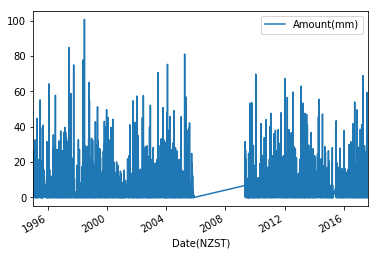

In [264]:
data.plot()

In [265]:
data.index[0]

Timestamp('1995-01-15 00:00:00')

In [266]:
data.index[-1]

Timestamp('2017-08-15 00:00:00')

In [267]:
len(data)

6737

In [268]:
dates = pd.date_range(start=data.index[0], end=data.index[-1], freq='D')

In [269]:
len(dates)

8249

In [270]:
data_reindexed = data.reindex(dates)

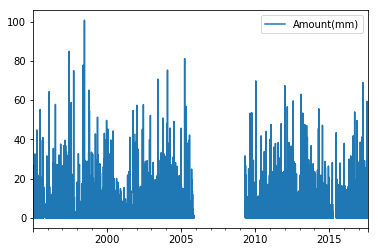

In [271]:
data_reindexed.plot()

In [272]:
data_reindexed = data_reindexed.loc['2014':,:]

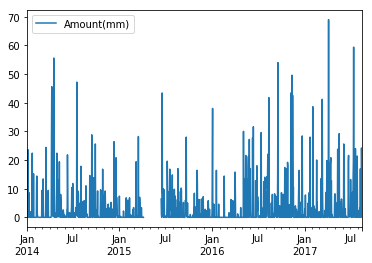

In [273]:
data_reindexed.plot()

In [274]:
any(pd.isnull(data_reindexed))

True

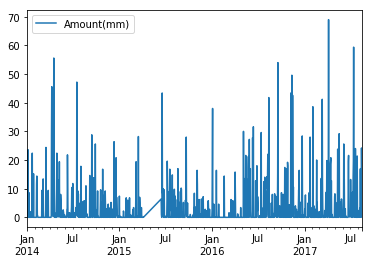

In [275]:
data_reindexed.interpolate().plot()

#### Another example: UP-sampling and linear interpolation 

MSLP at Ouloup station (Ouvea): 1 hour interval, but need to be on 15 minutes interval, with linear interpolation

In [276]:
data = pd.read_csv('../data/OULOUP_PMER.csv', index_col=0, parse_dates=True)

In [277]:
data.head()

,POSTE,PMER
2017-02-01 00:00:00,98820001,1012.3
2017-02-01 01:00:00,98820001,1011.7
2017-02-01 02:00:00,98820001,1011.1
2017-02-01 03:00:00,98820001,1011.0
2017-02-01 04:00:00,98820001,1011.1


In [278]:
data = data.loc[:,['PMER']]

In [279]:
data.head()

,PMER
2017-02-01 00:00:00,1012.3
2017-02-01 01:00:00,1011.7
2017-02-01 02:00:00,1011.1
2017-02-01 03:00:00,1011.0
2017-02-01 04:00:00,1011.1


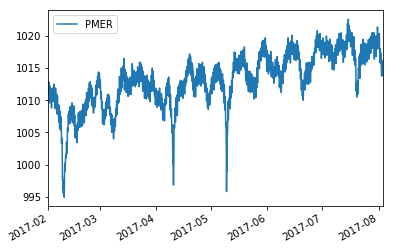

In [280]:
data.plot()

In [281]:
data.head()

,PMER
2017-02-01 00:00:00,1012.3
2017-02-01 01:00:00,1011.7
2017-02-01 02:00:00,1011.1
2017-02-01 03:00:00,1011.0
2017-02-01 04:00:00,1011.1


In [282]:
data.resample?

Signature:
data.resample(
    rule,
    how=None,
    axis=0,
    fill_method=None,
    closed=None,
    label=None,
    convention='start',
    kind=None,
    loffset=None,
    limit=None,
    base=0,
    on=None,
    level=None,
)
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time
series. Object must have a datetime-like index (`DatetimeIndex`,
`PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
to the `on` or `level` keyword.

Parameters
----------
rule : str
    The offset string or object representing target conversion.
how : str
    Method for down/re-sampling, default to 'mean' for downsampling.

    .. deprecated:: 0.18.0
       The new syntax is ``.resample(...).mean()``, or
       ``.resample(...).apply(<func>)``
axis : {0 or 'index', 1 or 'columns'}, default 0
    Which axis to use for up- or down-sampling. For `Series` this
    will default to 0, i.e. along the rows. Must be
    `DatetimeIndex`, `Timedelta

In [288]:
upsampled = data.resample('15min')

In [289]:
upsampled

DatetimeIndexResampler [freq=<15 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]

In [290]:
upsampled = upsampled.interpolate(method='linear')

In [291]:
upsampled.head()

,PMER
2017-02-01 00:00:00,1012.30
2017-02-01 00:15:00,1012.15
2017-02-01 00:30:00,1012.00
2017-02-01 00:45:00,1011.85
2017-02-01 01:00:00,1011.70


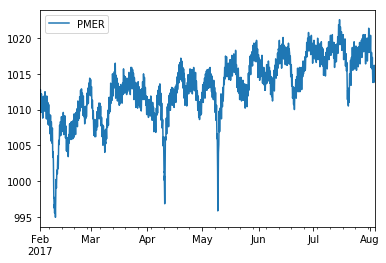

In [292]:
upsampled.plot()

#### downsampling: going from higher to lower frequency

In [293]:
data.head()

,PMER
2017-02-01 00:00:00,1012.3
2017-02-01 01:00:00,1011.7
2017-02-01 02:00:00,1011.1
2017-02-01 03:00:00,1011.0
2017-02-01 04:00:00,1011.1


In [294]:
downsampled = data.resample('1D').mean()

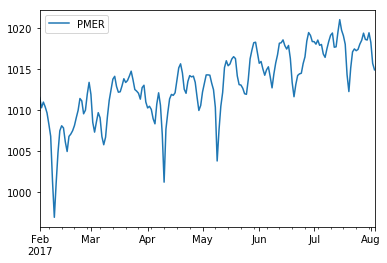

In [295]:
downsampled.plot()

#### rolling window operations 

In [296]:
rmean3days = downsampled.rolling(3, min_periods=3).mean()

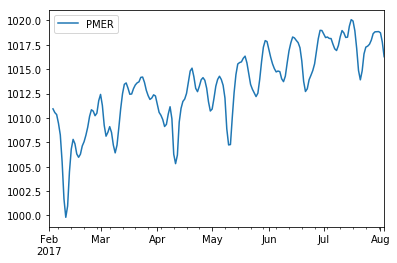

In [297]:
rmean3days.plot()

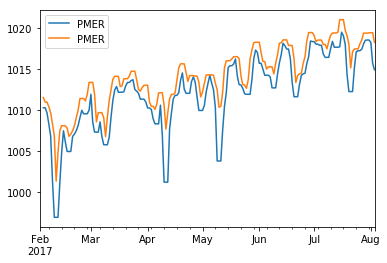

In [298]:
f, ax = plt.subplots()
downsampled.rolling(3, min_periods=3).min().plot(ax=ax)
downsampled.rolling(3, min_periods=3).max().plot(ax=ax)

#### you can define your OWN function and pass it to the rolling dataframe object, using the `apply` method

In [299]:
def maxmin(x):
    return x.max() - x.min()

In [300]:
maxmin_data = downsampled.rolling(3, min_periods=3).apply(maxmin)

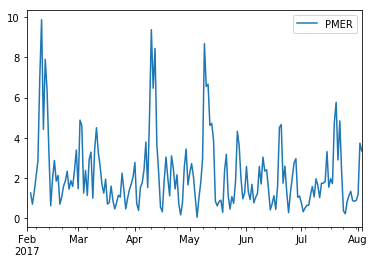

In [301]:
maxmin_data.plot()